# Exercise 2. Seeded Clouds
![picture 1](images/af803a28f14d490dc75c64452db63c3d326991ca98535d20a1d631ee08ad1883.png)  


## 2A

![picture 2](images/4aa5133ac8e47114d4352f201f47d4d1b1944a0e539efbf6e6e16bd958f7f6e4.png)  


In [1]:
# Load in the clouds data
clouds_data <- read.table("clouds.txt", header = T)
head(clouds_data)

seeded,unseeded
129.6,26.10
31.4,26.30
2745.6,87.00
489.1,95.00
430.0,372.40
302.8,0.01


#### First let's see some data characteristics:

In [2]:
mean(clouds_data$seeded); mean(clouds_data$unseeded); shapiro.test(clouds_data$seeded); shapiro.test(clouds_data$unseeded)

[1] 441.9846

[1] 164.5619


	Shapiro-Wilk normality test

data:  clouds_data$seeded
W = 0.65626, p-value = 1.411e-06



	Shapiro-Wilk normality test

data:  clouds_data$unseeded
W = 0.60257, p-value = 3.166e-07


png 
  3

png 
  2

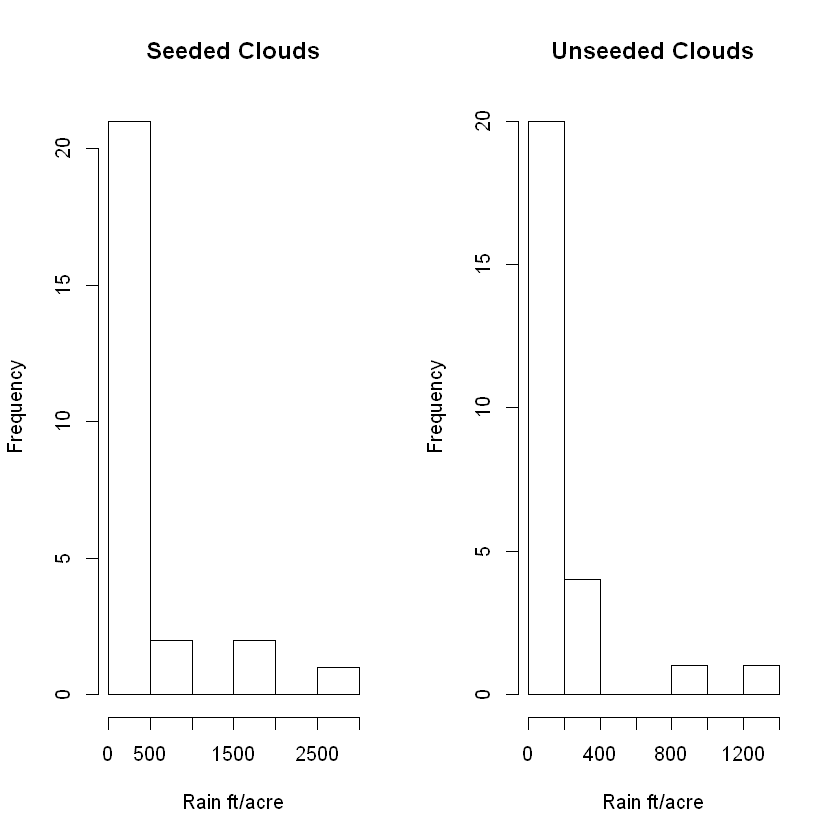

In [3]:
par(mfrow = c(1, 2))
hist(clouds_data$seeded, main='Seeded Clouds', xlab='Rain ft/acre'); hist(clouds_data$unseeded, main = "Unseeded Clouds",xlab='Rain ft/acre')
dev.copy(png,'plots/2a_hist.png', width=800, height=400)
dev.off()

png 
  3

png 
  2

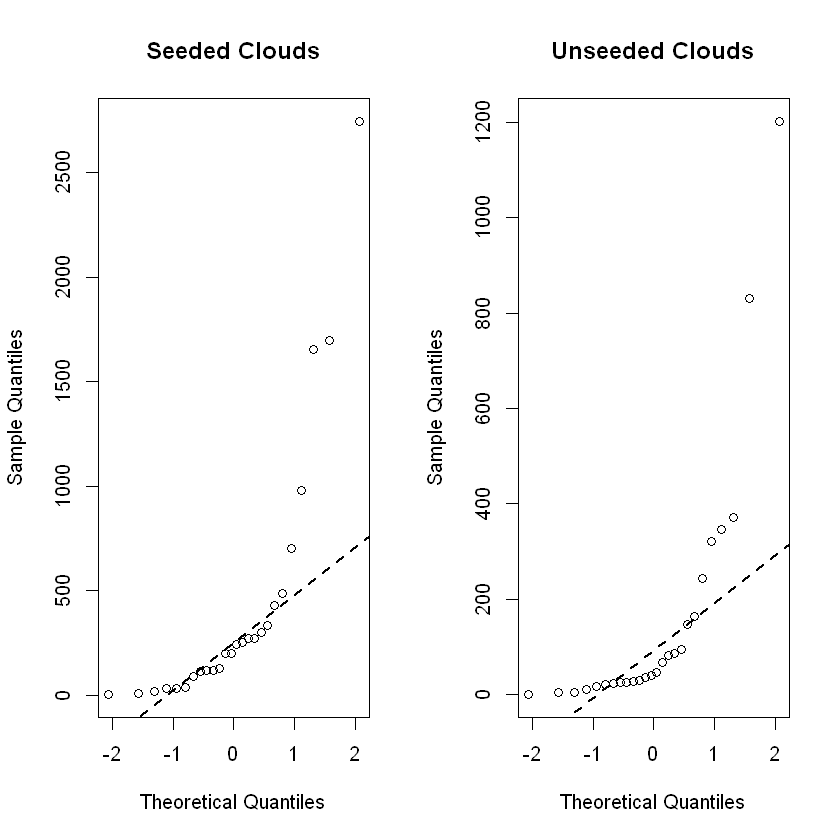

In [4]:
par(mfrow = c(1, 2))
qqnorm(clouds_data$seeded, main='Seeded Clouds'); qqline(clouds_data$seeded, col = 1,lwd=2,lty=2) 
qqnorm(clouds_data$unseeded, main='Unseeded Clouds'); qqline(clouds_data$unseeded, col = 1,lwd=2,lty=2) 
dev.copy(png,'plots/2a_qqnorm.png', width=800, height=400)
dev.off()

#### Both data samples are not normally distributed

#### First test, two-sampled T test:

In [5]:
t.test(clouds_data$seeded, clouds_data$unseeded, paired = TRUE, alternative = "two.sided")


	Paired t-test

data:  clouds_data$seeded and clouds_data$unseeded
t = 2.1204, df = 25, p-value = 0.04407
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
   7.961957 546.883428
sample estimates:
mean of the differences 
               277.4227 


#### The Paired Sample T-test indicates that the two distributions differ significantly, now to test the question of whether being seeded with nitrate increases rainfall:

In [6]:
t.test(clouds_data$seeded, clouds_data$unseeded, paired = FALSE, alternative = "greater")


	Welch Two Sample t-test

data:  clouds_data$seeded and clouds_data$unseeded
t = 1.9984, df = 33.856, p-value = 0.02688
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 42.65827      Inf
sample estimates:
mean of x mean of y 
 441.9846  164.5619 


#### This seems to indicate that nitrate seeding does indicate higher rainfall, however, the data is not normally distributed and therefore this test is not applicable. I would argue paired to not be true, since 52 unique clouds were sampled, without taking a cloud, measuring it, and then adding nitrate.
#### Next, we use the mann-whitney u test:

In [7]:
# We again add alternative to be "greater"
wilcox.test(clouds_data$seeded, clouds_data$unseeded, alternative = "greater")

Warning message in wilcox.test.default(clouds_data$seeded, clouds_data$unseeded, :
"cannot compute exact p-value with ties"


	Wilcoxon rank sum test with continuity correction

data:  clouds_data$seeded and clouds_data$unseeded
W = 473, p-value = 0.006916
alternative hypothesis: true location shift is greater than 0


#### This parametric test can be used since it's only requirement is that the two groups must be independent, which we may assume. Also the data must be continuous, which is the case
#### The last test is the Kolmogorov-Smirnov test, this time with alternative = "less", due to the documentation: (Thus in the two-sample case alternative = "greater" includes distributions for which x is stochastically smaller than y (the CDF of x lies above and hence to the left of that for y), in contrast to t.test or wilcox.test)). Normally this test is used to assess normality just like the shapiro wilk, but in our case it is used to test if the seeded distribution has significantly increased rainfall compared to the unseeded distribution:

In [8]:
ks.test(clouds_data$seeded, clouds_data$unseeded, alternative = 'less')

Warning message in ks.test(clouds_data$seeded, clouds_data$unseeded, alternative = "less"):
"cannot compute exact p-value with ties"


	Two-sample Kolmogorov-Smirnov test

data:  clouds_data$seeded and clouds_data$unseeded
D^- = 0.42308, p-value = 0.009525
alternative hypothesis: the CDF of x lies below that of y


#### In conclusion, all tests agree with the hypothesis. However, due to non-normality of (both) the distribution(s), we may only take into account the results of the mann-whitney U- and Kolmogorov-Smirnov tests.

## 2B

![picture 3](images/ac6da0ebb103c2c81bf4d7c7b922fb401dbf59285cddd30259fa3d5f35cd410d.png)  


#### First we repeat all previous tests on the square root of the values:

In [9]:
sqrt_seeded <- sqrt(clouds_data$seeded)
sqrt_unseeded <- sqrt(clouds_data$unseeded)
sqrt_sqrt_seeded <- sqrt(sqrt_seeded)
sqrt_sqrt_unseeded <- sqrt(sqrt_unseeded)

# Quick normality tests
shapiro.test(sqrt_seeded); shapiro.test(sqrt_unseeded)


	Shapiro-Wilk normality test

data:  sqrt_seeded
W = 0.87394, p-value = 0.004298



	Shapiro-Wilk normality test

data:  sqrt_unseeded
W = 0.83744, p-value = 0.0008196


png 
  3

png 
  2

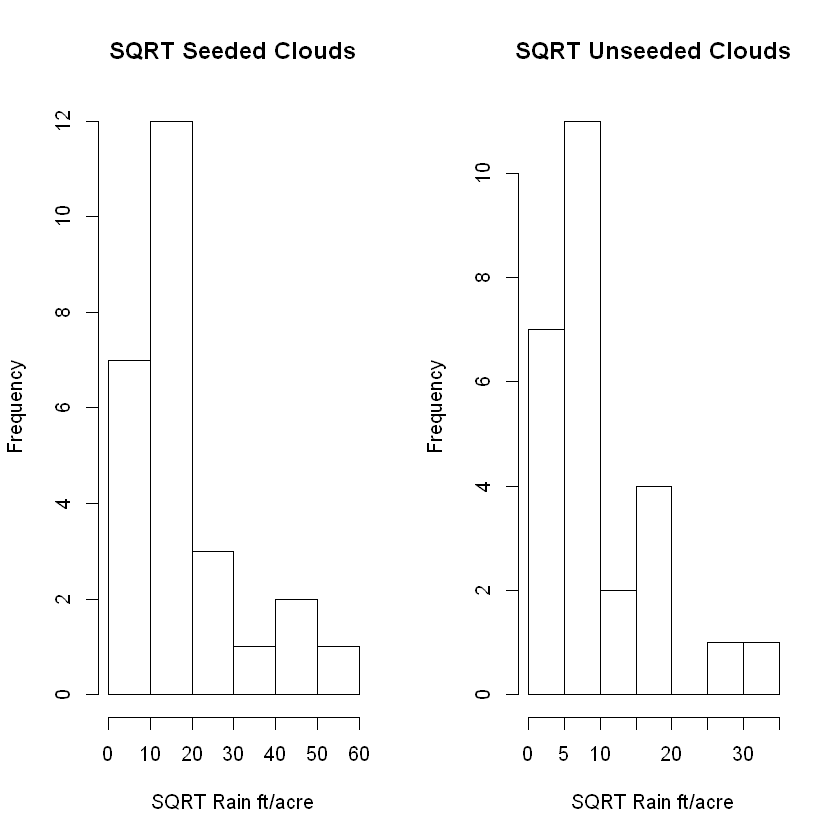

In [10]:
par(mfrow = c(1, 2))
hist(sqrt_seeded, main='SQRT Seeded Clouds', xlab='SQRT Rain ft/acre'); hist(sqrt_unseeded, main = "SQRT Unseeded Clouds",xlab='SQRT Rain ft/acre')
dev.copy(png,'plots/2b_sqrt_hist.png', width=800, height=400)
dev.off()

png 
  3

png 
  2

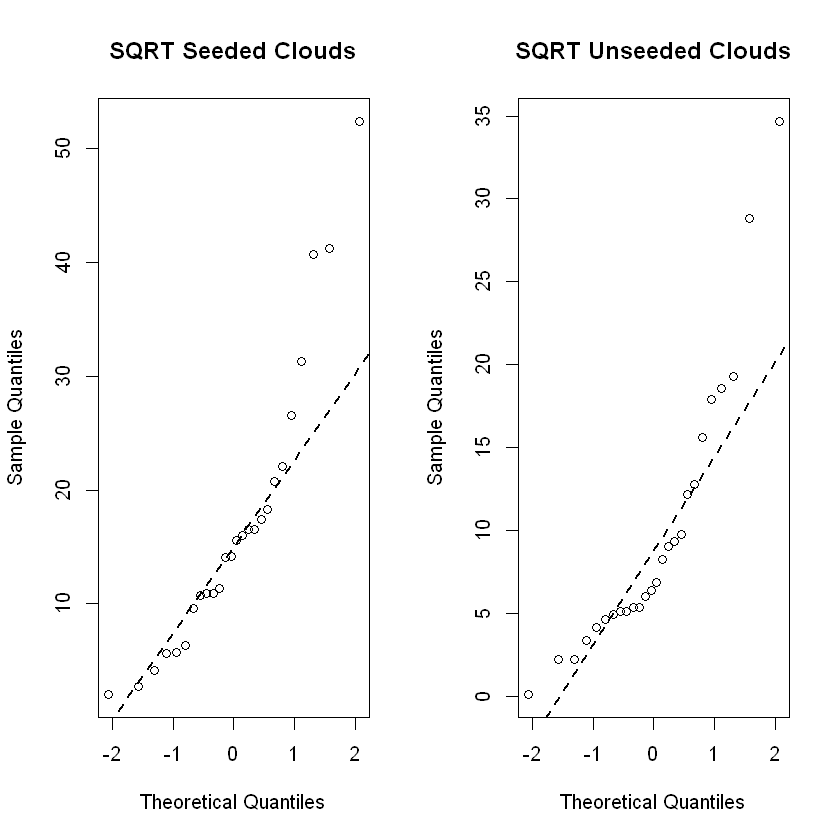

In [11]:
par(mfrow = c(1, 2))
qqnorm(sqrt_seeded, main='SQRT Seeded Clouds'); qqline(sqrt_seeded, col = 1,lwd=2,lty=2) 
qqnorm(sqrt_unseeded, main='SQRT Unseeded Clouds'); qqline(sqrt_unseeded, col = 1,lwd=2,lty=2) 
dev.copy(png,'plots/2b_sqrt_qqnorm.png', width=800, height=400)
dev.off()

#### The data remains non-normal, so while we do all three tests for the assignment, we cannot include the results of the t-test:

In [12]:
t.test(sqrt_seeded, sqrt_unseeded, paired = FALSE, alternative = "greater")
wilcox.test(sqrt_seeded, sqrt_unseeded, alternative = "greater")
ks.test(sqrt_seeded, sqrt_unseeded, alternative = 'less')


	Welch Two Sample t-test

data:  sqrt_seeded and sqrt_unseeded
t = 2.4246, df = 43.363, p-value = 0.009782
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 2.189448      Inf
sample estimates:
mean of x mean of y 
17.068014  9.931321 


Warning message in wilcox.test.default(sqrt_seeded, sqrt_unseeded, alternative = "greater"):
"cannot compute exact p-value with ties"


	Wilcoxon rank sum test with continuity correction

data:  sqrt_seeded and sqrt_unseeded
W = 473, p-value = 0.006916
alternative hypothesis: true location shift is greater than 0


Warning message in ks.test(sqrt_seeded, sqrt_unseeded, alternative = "less"):
"cannot compute exact p-value with ties"


	Two-sample Kolmogorov-Smirnov test

data:  sqrt_seeded and sqrt_unseeded
D^- = 0.42308, p-value = 0.009525
alternative hypothesis: the CDF of x lies below that of y


#### We have stransformed the data by taking the square root of both datasets, however, this does not change the distribution and therefor still indicates that silver nitrate increases rainfaill

#### And now for the square root of the square root of the data:

In [13]:
shapiro.test(sqrt_sqrt_seeded); shapiro.test(sqrt_sqrt_unseeded)


	Shapiro-Wilk normality test

data:  sqrt_sqrt_seeded
W = 0.96504, p-value = 0.5004



	Shapiro-Wilk normality test

data:  sqrt_sqrt_unseeded
W = 0.95778, p-value = 0.3497


png 
  3

png 
  2

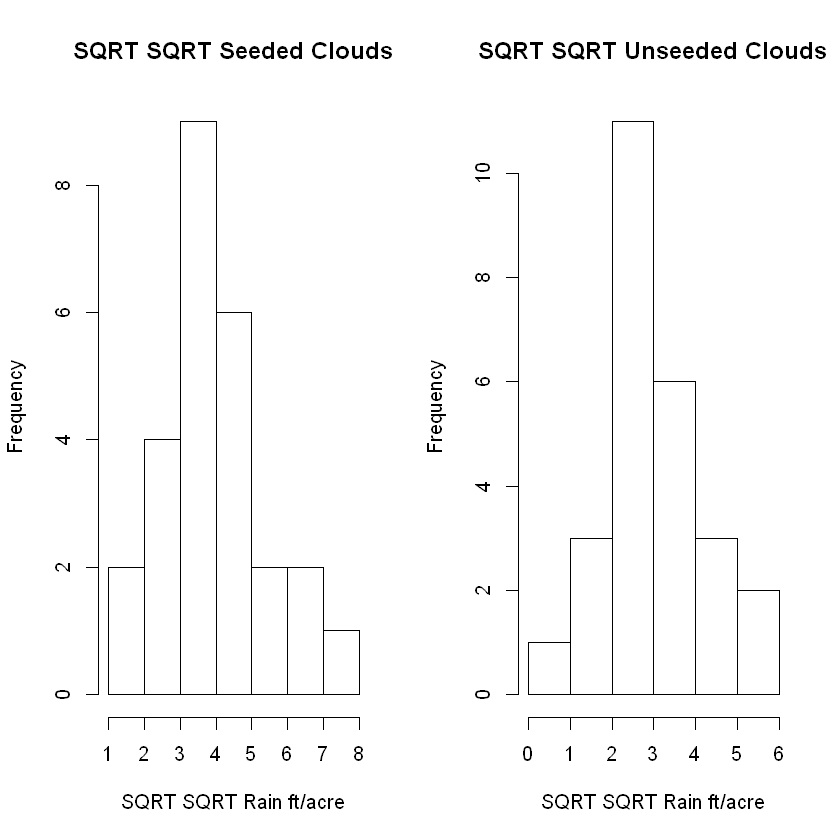

In [14]:
par(mfrow = c(1, 2))
hist(sqrt_sqrt_seeded, main='SQRT SQRT Seeded Clouds', xlab='SQRT SQRT Rain ft/acre'); hist(sqrt_sqrt_unseeded, main = "SQRT SQRT Unseeded Clouds",xlab='SQRT SQRT Rain ft/acre')
dev.copy(png,'plots/2b_sqrt_sqrt_hist.png', width=800, height=400)
dev.off()

png 
  3

png 
  2

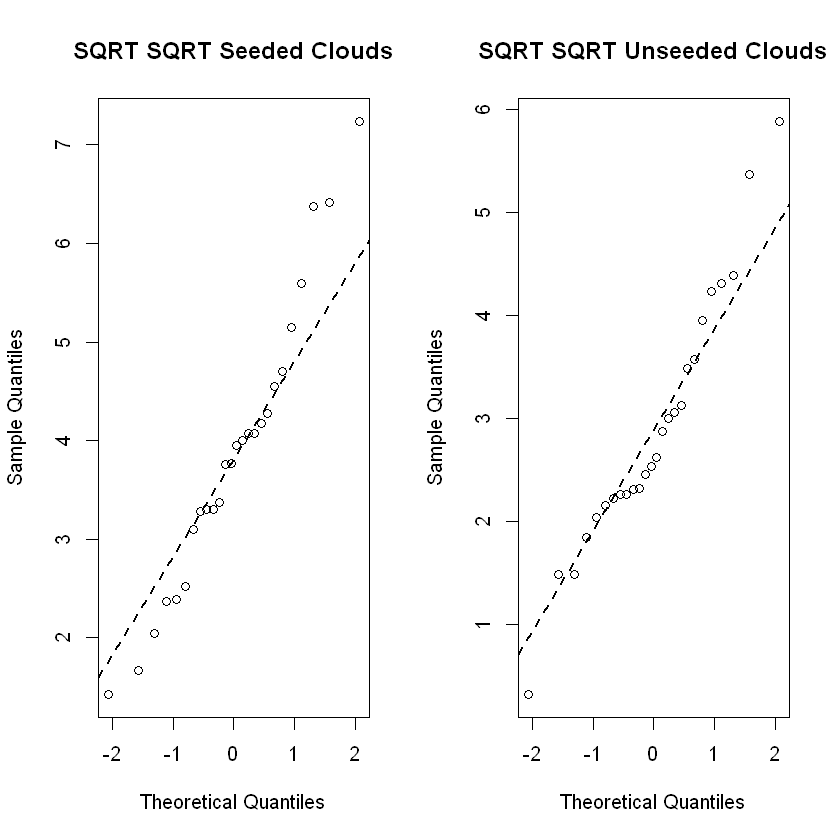

In [15]:
par(mfrow = c(1, 2))
qqnorm(sqrt_sqrt_seeded, main='SQRT SQRT Seeded Clouds'); qqline(sqrt_sqrt_seeded, col = 1,lwd=2,lty=2) 
qqnorm(sqrt_sqrt_unseeded, main='SQRT SQRT Unseeded Clouds'); qqline(sqrt_sqrt_unseeded, col = 1,lwd=2,lty=2) 
dev.copy(png,'plots/2b_sqrt_sqrt_qqnorm.png', width=800, height=400)
dev.off()

#### Interestingly, the sqrt_sqrt versions now show normality, meaning all previously used tests become available for use:

In [16]:
t.test(sqrt_sqrt_seeded, sqrt_sqrt_unseeded, paired = FALSE, alternative = "greater")
wilcox.test(sqrt_sqrt_seeded, sqrt_sqrt_unseeded, alternative = "greater")
ks.test(sqrt_sqrt_seeded, sqrt_sqrt_unseeded, alternative = 'less')


	Welch Two Sample t-test

data:  sqrt_sqrt_seeded and sqrt_sqrt_unseeded
t = 2.5968, df = 48.826, p-value = 0.0062
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.3442816       Inf
sample estimates:
mean of x mean of y 
 3.878988  2.907340 


Warning message in wilcox.test.default(sqrt_sqrt_seeded, sqrt_sqrt_unseeded, alternative = "greater"):
"cannot compute exact p-value with ties"


	Wilcoxon rank sum test with continuity correction

data:  sqrt_sqrt_seeded and sqrt_sqrt_unseeded
W = 473, p-value = 0.006916
alternative hypothesis: true location shift is greater than 0


Warning message in ks.test(sqrt_sqrt_seeded, sqrt_sqrt_unseeded, alternative = "less"):
"cannot compute exact p-value with ties"


	Two-sample Kolmogorov-Smirnov test

data:  sqrt_sqrt_seeded and sqrt_sqrt_unseeded
D^- = 0.42308, p-value = 0.009525
alternative hypothesis: the CDF of x lies below that of y


#### So applying the transformation has made our distributions approximately normal, allowing us to use the previously mentioned two sample t-test for the first time. However, none of our statistical values has changed because of the transformation

## 2C

![picture 6](images/f4f9f9834378fb6408cf1bbb25020407e3e31668f6ccd3ed8560888eddd33b29.png)  


#### So here we use sampling to estimate the distribution of our seeded clouds data, and construct the 95%-confidence interval with a bootstrap test. First, lets generate a sample distribution:

In [17]:
population <- clouds_data$seeded

T <- median(population)

iter <- 1000
samples <- numeric(iter)

for(iter in 1:iter) {
    sample <- sample(population, replace=T)
    samples[iter] <- median(sample)}

samples_025 <- quantile(samples, 0.025)
samples_975 <- quantile(samples, 0.975)

T; 2 * T - samples_025; median(samples); 2 * T - samples_975

[1] 221.6

2.5% 
324.9

[1] 221.6

97.5% 
138.8

png 
  3

png 
  2

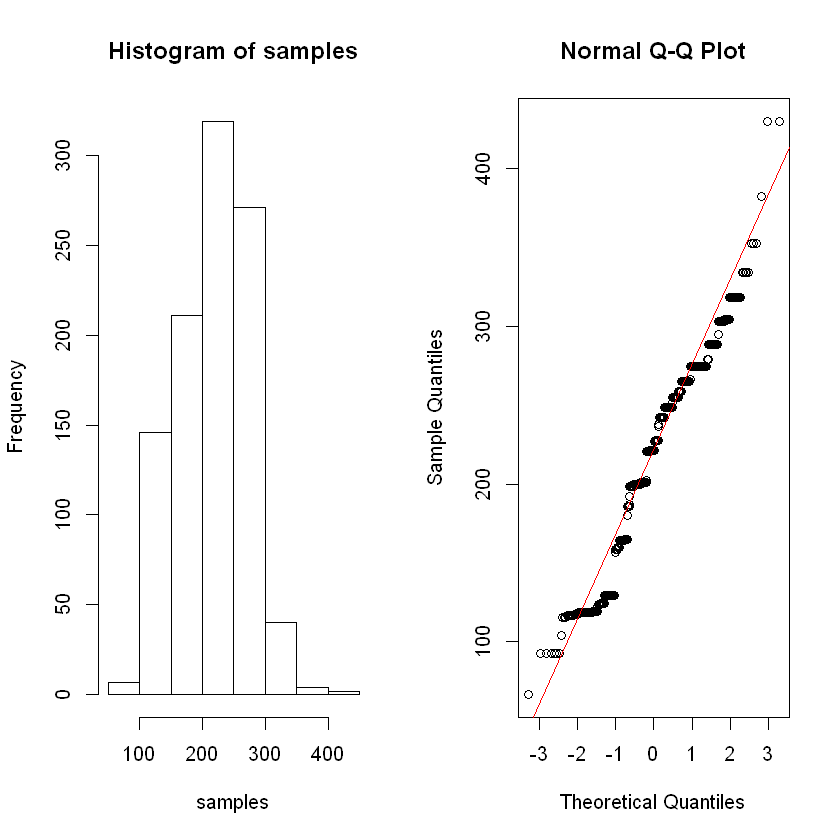

In [18]:
par(mfrow=c(1,2))
hist(samples); qqnorm(samples); qqline(samples, col = 'red')
dev.copy(png,'plots/2c_hist_qq_samples.png', width=800, height=400)
dev.off()

Neither the histogram, nor the qqplot give any indication of the samples being exponentially distributed

To perform the Kolmogorov-Smirnov test we compare the sampled values with the actual values

In [21]:
ks.test(samples, pexp)

Warning message in ks.test(samples, pexp):
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  samples
D = 1, p-value < 2.2e-16
alternative hypothesis: two-sided


In [ ]:
par(mfrow=c(1,2))
hist(population); qqnorm(population); qqline(population, col = 'red')
dev.copy(png,'plots/2c_hist_qq_population.png', width=800, height=400)
dev.off()

The null hypothesis for the Kolmogorov-Smirnov test is that samples come from an exponential distribution, but we can reject the null hypothesis based on the test results. 

## 2D

![picture 1](../images/f8d6ce07e6fd3e472396ad490ec3dac164f6e08770214c7c021058ea8780a725.png)  


#### A one-sample wilcoxon test can be used to test the median of a population against a known value, in this case "Less than 300":

In [ ]:
median(population)

In [ ]:
wilcox.test(population, mu = 300, paired = F, alternative = 'less')

#### The Wilcox Test shows non-significant results. Our next task is to use a test to assess whether the fraction of clouds with precipitation of less than 30 is at most 30%

In [ ]:
# Method one, counting:
# Method 2, quantiles
sum(population < 30) < length(population) * 0.25 
30 < quantile(population, 0.25)

#### Both tests show the assumption to be correct.